**ВАЖНО!** Чтобы ваше решение сохранялось и вы могли его нам предоставить в качестве ответа, сохраните себе копию ноутбука (_Файл_ -> _Сохранить копию на Диск_). 

Затем разрешите доступ к ноутбуку по ссылке (_Поделиться_ -> _Все у кого есть ссылка_)



Прежде чем перейти к написанию запросов SQL, необходимо отработать параграф "Загрузка и подключение к базе данных"


Сделать это можно нажав на кнопку 
 image.png в левом верхнем углу ячейки, вы ее увидите если наведете мышь на соответствующую ячейку, либо воспользоваться комбинацией клавиш `Ctrl+Enter` или `Shift+Enter`

 Так же нужно ознакомиться с параграфом "Инструкция"  

 Теперь вы готовы писать запрос!

## Загрузка и подключение к базе данных

In [1]:
import gdown

!gdown 'https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0'

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id='https://drive.google.com/uc?id=1pmfc0FrkMvlM2SITpFz6bilk-dvDG_y0' 



In [13]:
!pip install SQLAlchemy==1.4.46


The sql module is not an IPython extension.


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [3]:
%sql sqlite:///data/data.db

%config SqlMagic.displaylimit = 50


## Инструкция

Чтобы писать запросы к базе, нужно перед телом запроса указать команду

`%sql` -- для однострочных запросов, например:

`%sql select count(*) from table_name`

Или же `%%sql` для многострочных запросов:
```
%%sql
select
  count(*)
from 
  table_1 as a 
  join table_2 as b on 
    a.col_1 = b.col_b
```

Также результат запроса можно сохранить в переменную:

`%sql create table qwerty as select * from queue`

А для многострочных запросов, поспользоваться оператором `<<`:
```
%%sql row_count <<
select
  count(*)
from 
  table_1 as a 
  join table_2 as b on 
    a.col_1 = b.col_b
```
Далее можно обращаться к созданной переменной в других ячейках.


---


Ещё имеется возможность преобразовать результат запроса в `pandas.DataFrame`:

```
result = %sql SELECT * FROM character WHERE speechcount > 25
dataframe = result.DataFrame()
```

Либо конвертировать результирующую таблицу в CSV формат, скачать её и использовать, для дальнейшей обработки (анализ, визуализация, построение дашбордов):

```
result = %sql select * from sqlite_master;
result.csv(filename='tables.csv');
```
Файл появится в меню "Файл" слева от рабочей области ноутбука.
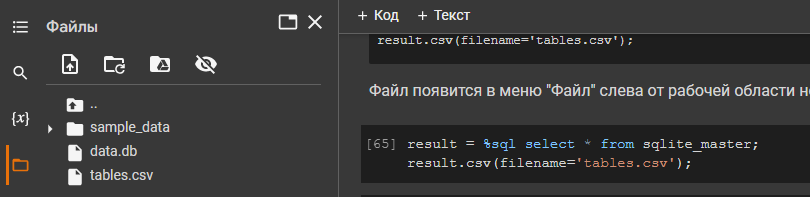

Можно вывести список имеющихся таблиц в базе:

In [5]:
%sql select tbl_name, "sql" from sqlite_master;

 * sqlite:///data/data.db
Done.


tbl_name,sql
mngmnt,"CREATE TABLE mngmnt ( org_management_rk BIGINT, management_nm TEXT)"
product,"CREATE TABLE product ( hit_rk BIGINT, hid BIGINT, using_flg FLOAT)"
queue,"CREATE TABLE queue ( queue_id BIGINT, queue_desc TEXT)"
result,"CREATE TABLE result ( hit_status_result_id BIGINT, hit_status_result_desc TEXT)"
horoscope,"CREATE TABLE horoscope ( agent_login TEXT, horoscope TEXT)"
group,"CREATE TABLE ""group"" ( org_group_rk BIGINT, org_management_rk BIGINT, group_nm TEXT)"
emp_x_org_gr,"CREATE TABLE emp_x_org_gr ( employee_rk BIGINT, org_group_rk BIGINT)"
task,"CREATE TABLE task ( task_rk BIGINT, task_stage_id FLOAT, source_system_cd TEXT, create_dttm TEXT, finish_dttm TEXT)"
action,"CREATE TABLE action ( hit_rk BIGINT, hit_status_result_id BIGINT)"
call,"CREATE TABLE call ( wo_hit_rk BIGINT, wo_task_rk BIGINT, wo_queue_id BIGINT, agent_login TEXT, wo_employee_rk BIGINT, finish_dttm TEXT, duratoin_sec TEXT)"


# Задание 1
Необходимо с помощью SQL запроса собрать одну общую таблицу из всех данных витрин, которая должна включать в себя все поля этих витрин.
В качестве ответа предоставить ссылку на вашу копию страницы, где можно увидеть написанный запрос и собранную таблицу. Ссылку вставьте в Word файл "Техническое задание" в соответствующее поле.


_(одна из таблиц называется `group`, её имя конфликтует с зарезервированными ключевым словом SQL, поэтому его нужно будет заключить в двойные кавычки `""`)_


## Решение

In [5]:
%%sql response <<
    select
        c.wo_hit_rk as hit_rk, 
        c.wo_task_rk as task_rk, 
        c.wo_queue_id as queue_id, 
        c.agent_login, 
        c.wo_employee_rk, 
        datetime(c.finish_dttm) as call_finish_dttm,
        c.duratoin_sec,
        
        rt.*,
        
        pr.hid, 
        pr.using_flg,
        
        ts.task_stage_id, 
        ts.source_system_cd, 
        datetime(ts.create_dttm) as task_create_dttm, 
        datetime(ts.finish_dttm) as task_finish_dttm,
        
        qu.queue_desc,
        
        ho.horoscope,
        
        gr.group_nm,
        
        mn.management_nm
        
    from
        call as c
    left join
        action as ac on ac.hit_rk = c.wo_hit_rk
    left join
        result as rt on rt.hit_status_result_id = ac.hit_status_result_id
    left join
        product as pr on pr.hit_rk = ac.hit_rk
    left join
        task as ts on ts.task_rk = c.wo_task_rk
    left join
        queue as qu on qu.queue_id = c.wo_queue_id
    left join
        horoscope as ho on ho.agent_login = c.agent_login
    left join
        emp_x_org_gr as emp on emp.employee_rk = c.wo_employee_rk
    left join
        "group" as gr on gr.org_group_rk = emp.org_group_rk
    left join
        mngmnt as mn on mn.org_management_rk = gr.org_management_rk

 * sqlite:///data/data.db
Done.
Returning data to local variable response


# Задание 2
Необходимо посчитать следующие значения:

* Общее количество звонков со статусом «Дозвон, Успешно»;
* Продажная конверсия, по формуле:

  $$ Конверсия = \frac{N_{Дозвон, Успешно}}{N_{Дозвон, Успешно} + N_{Дозвон, Отказ}}$$
* Средняя длительность одной коммуникации, закрытой статусом «Дозвон, Успешно»

Ответы необходимо вписать в соответствующую таблицу в фаиле "Техническое задание"


## Решение

In [240]:
%%sql
    with table_one as (
    select
        c.wo_hit_rk as hit_rk, 
        c.wo_task_rk as task_rk, 
        c.wo_queue_id as queue_id, 
        c.agent_login, 
        c.wo_employee_rk, 
        datetime(c.finish_dttm) as call_finish_dttm,
        c.duratoin_sec,
        
        rt.*,
        
        pr.hid, 
        pr.using_flg,
        
        ts.task_stage_id, 
        ts.source_system_cd, 
        datetime(ts.create_dttm) as task_create_dttm, 
        datetime(ts.finish_dttm) as task_finish_dttm,
        
        qu.queue_desc,
        
        ho.horoscope,
        
        gr.group_nm,
        
        mn.management_nm
        
    from
        call as c
    left join
        action as ac on ac.hit_rk = c.wo_hit_rk
    left join
        result as rt on rt.hit_status_result_id = ac.hit_status_result_id
    left join
        product as pr on pr.hit_rk = ac.hit_rk
    left join
        task as ts on ts.task_rk = c.wo_task_rk
    left join
        queue as qu on qu.queue_id = c.wo_queue_id
    left join
        horoscope as ho on ho.agent_login = c.agent_login
    left join
        emp_x_org_gr as emp on emp.employee_rk = c.wo_employee_rk
    left join
        "group" as gr on gr.org_group_rk = emp.org_group_rk
    left join
        mngmnt as mn on mn.org_management_rk = gr.org_management_rk
    ),
    suc_call as (
        select 
            count(*) as suc
        from 
            table_one
        where hit_status_result_id = 3
    ),
    fail_call as (
        select 
            cast(count(*) as float) as fail
        from 
            table_one
        where hit_status_result_id = 1
    ),
    mean_suc_call as (
        select
            avg(cast(replace(duratoin_sec, ',', '.') as float)) as duration
        from
            table_one
        where 
            hit_status_result_id = 3
            --and duratoin_sec > 0
        order by 1
    ),
    fin as
    (select 
        1 as "Номер",
        suc as "Ответы"
    from 
        suc_call
        
        
    union all
    
    select
        2,
        round((suc / (suc + fail)), 2)
    from 
        suc_call
    join
        fail_call
        
    union all
    
    select
        3,
        round(duration, 2)
    from
        mean_suc_call
    
    )
    select * from fin
    
    
    limit 5

 * sqlite:///data/data.db
Done.


Номер,Ответы
1,3310
2,0.15
3,110.18


In [241]:
df = pd.DataFrame(response.DataFrame())

def _convert_object_to_date_and_time(x: pd.DataFrame) -> pd.DataFrame:
    x['call_finish_dttm'] = pd.to_datetime(x['call_finish_dttm'])
    x['task_create_dttm'] = pd.to_datetime(x['task_create_dttm'])
    x['task_finish_dttm'] = pd.to_datetime(x['task_finish_dttm'])
    x['duratoin_sec'] = x['duratoin_sec'].str.replace(',','.').astype(float)
    return x

def _create_date_create_dttm(x: pd.DataFrame) -> pd.DataFrame:
    x['date_create_dttm'] = x['task_create_dttm'].dt.date
    return x

df = (df
      .pipe(_convert_object_to_date_and_time)
      .pipe(_create_date_create_dttm)
      
      )

df_dummies = pd.concat((df, pd.get_dummies(df['hit_status_result_desc'])), axis=1, sort=False)
df_dummies['successful_duratoin_sec'] = df_dummies[df_dummies['Дозвон, Успешно'] == 1]['duratoin_sec']

a = df_dummies['Дозвон, Успешно'].sum()
b = round(df_dummies['Дозвон, Успешно'].sum() / (df_dummies['Дозвон, Успешно'].sum() + df_dummies['Дозвон, Отказ'].sum()), 2)
c = round(df_dummies['successful_duratoin_sec'].mean(), 2)
pd.DataFrame({
    'Ответы': [a, b, c]
})

,Ответы
0,3310.00
1,0.15
2,110.18


In [ ]:
df_group = df_dummies.groupby('date_create_dttm').agg(
    count_successful_call = ('Дозвон, Успешно', 'sum'),
    count_failure_call = ('Дозвон, Отказ', 'sum'),
    mean_duration_suc_call = ('successful_duratoin_sec', 'mean')
)
df_conversion = pd.DataFrame()
df_conversion['conversion'] = df_group['count_successful_call'] / (df_group['count_successful_call'] + df_group['count_failure_call'])
df_conversion['mean_duration_suc_call'] = df_group['mean_duration_suc_call'].round()
df_conversion.sort_values(by='conversion', ascending=False)

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 2021-03-07 to 2022-08-31
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Дозвон, Некорректное задание по звонку  19 non-null     float64
 1   Дозвон, Отказ                           111 non-null    float64
 2   Дозвон, Отложить                        81 non-null     float64
 3   Дозвон, Перезвонить                     112 non-null    float64
 4   Дозвон, Успешно                         82 non-null     float64
 5   Не было звонка                          41 non-null     float64
 6   Недозвон                                134 non-null    float64
dtypes: float64(7)
memory usage: 10.2+ KB


Text(0.5, 1.0, 'Темные области - заполненные данные, светлые - пропуски')

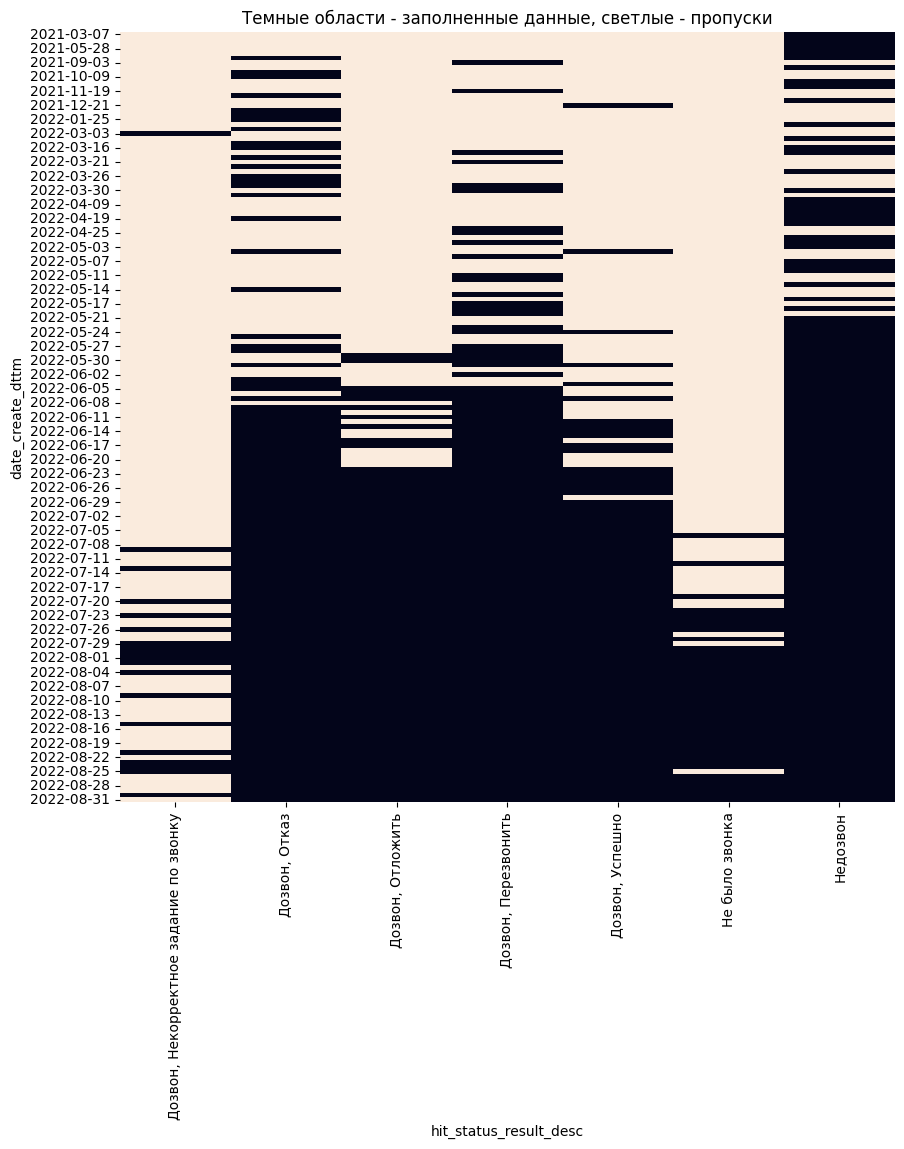

In [ ]:
df_pivot_table = df.pivot_table(
    values='hit_rk',
    index='date_create_dttm',
    columns='hit_status_result_desc',
    aggfunc='count'
)
df_pivot_table.info()
plt.figure(figsize=(10,10))
sns.heatmap(~df_pivot_table.isnull(), cbar=False, cmap=sns.cm.rocket_r).set_title('Темные области - заполненные данные, светлые - пропуски')